# TITANIC PREDICTIVE MODEL - LOGISTIC REGRESSION

## 1. Imports/Readings 

In [111]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Output of plotting commands is displayed inline, directly below the code cell that produced it
%matplotlib inline 

In [ ]:
#Read training data
train = pd.read_csv("titanic_train.csv")

## 2. Data understanding

In [6]:
#Returns the first n rows
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#Get a concise summary of the dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


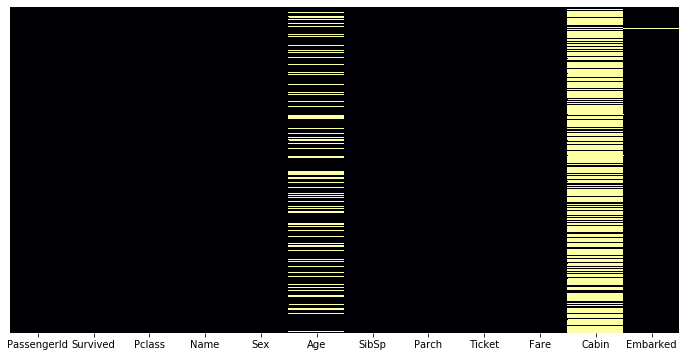

In [12]:
#Data exploration analysis: there is a register of missing data (age, cabin, embarked) that needs to be processed
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='inferno')

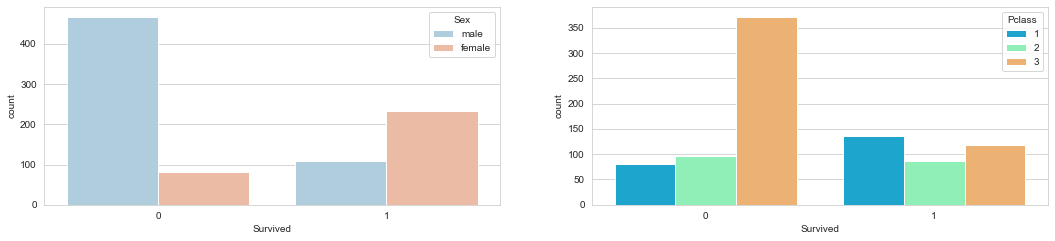

In [37]:
#Whitegrid theme is better suited to plots with heavy data elements
sns.set_style('whitegrid')

#Size of the figures
fig = plt.figure(figsize=(18,8))

#Analysis of the survivors: n.º of people !survived > n.º of people survived | n.º of females survived > n.º of males survived
plt.subplot(2, 2, 1)
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')

#Analysis of the survivors: Pclass = 3 was the class with the major number of deaths
plt.subplot(2, 2, 2)
sns.countplot(x='Survived', data=train, hue='Pclass', palette='rainbow')

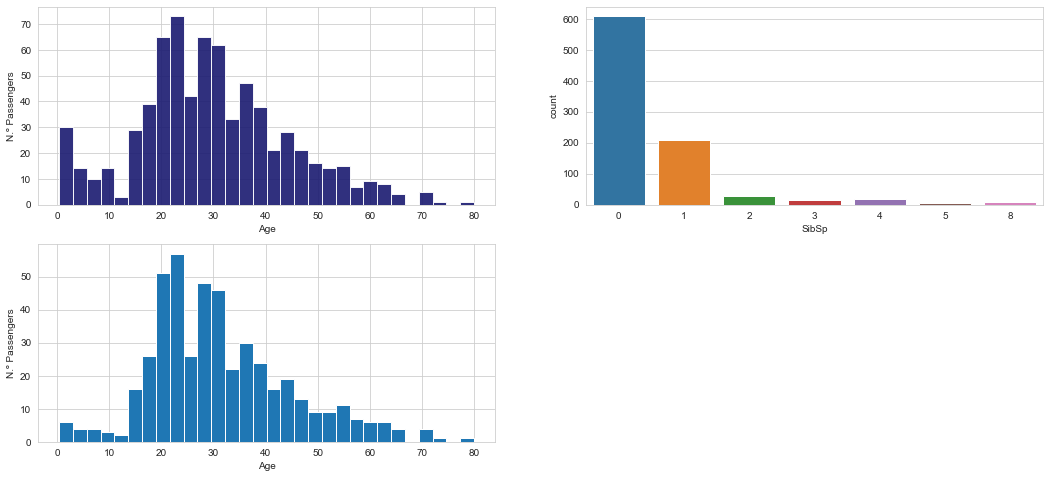

In [40]:
#Whitegrid theme is better suited to plots with heavy data elements
sns.set_style('whitegrid')

#Size of the figures
fig = plt.figure(figsize=(18,8))

#Age distribution: the majority of the passengers were 20-30 years old 
plt.subplot(2, 2, 1)
plt.xlabel('Age')
plt.ylabel('N.º Passengers')
train['Age'].hist(bins=30, color='midnightblue', alpha=0.9)

#Analysis of the people accompanying the passengers: The majority of the passengers were alone (has to be expected from the 
#previous distribution)
plt.subplot(2, 2, 2)
sns.countplot(x='SibSp', data=train)

#Confirming the conclusions from the previous analysis
plt.subplot(2, 2, 3)
plt.xlabel('Age')
plt.ylabel('N.º Passengers')
train[train['SibSp'] == 0]['Age'].hist(bins=30)

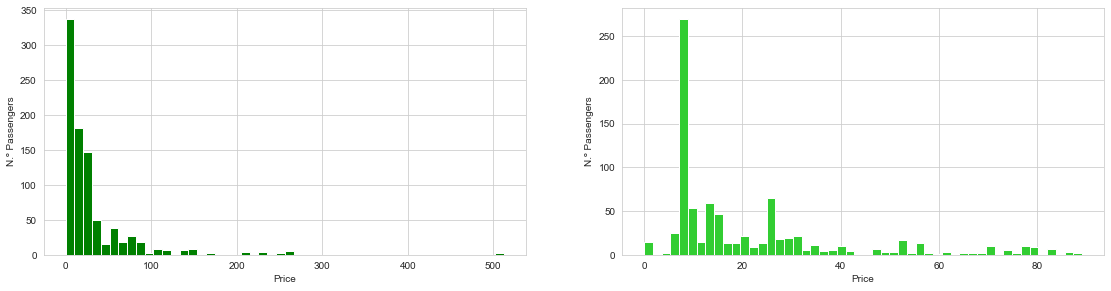

In [83]:
#Whitegrid theme is better suited to plots with heavy data elements
sns.set_style('whitegrid')

#Analysis of the prices: Most passengers payed less than 90
plt.subplot(2, 2, 1)
plt.xlabel('Price')
plt.ylabel('N.º Passengers')
train['Fare'].hist(color='green', bins=50, figsize=(19,10))

#Zoom of the prices < 90
plt.subplot(2, 2, 2)
plt.xlabel('Price')
plt.ylabel('N.º Passengers')
train[train['Fare']<90]['Fare'].hist(color='limegreen', bins=50, figsize=(19,10))

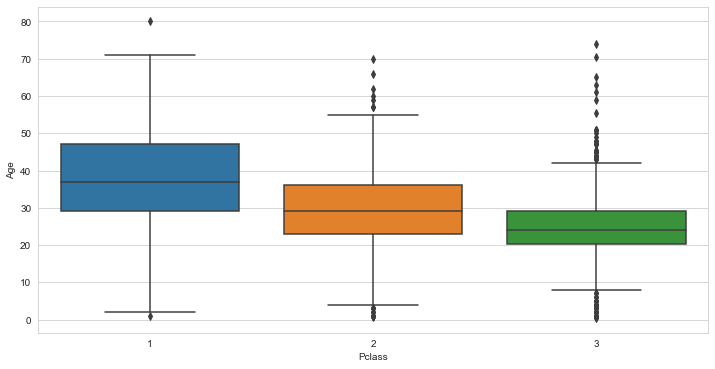

In [84]:
#Whitegrid theme is better suited to plots with heavy data elements
sns.set_style('whitegrid')

#Size of the figures
fig = plt.figure(figsize=(12,6))

#Analysis of the classes: The younger class is the Pclass = 3
sns.boxplot(x='Pclass', y='Age', data=train)

## 3. Data cleaning

In [85]:
#Function to replace null with the mean age of the corresponding group
def input_age(cols):
    Age = cols[0]
    Class = cols[1]
    
    if pd.isnull(Age):
        if Class == 1:
            return 37
        elif Class == 2:
            return 29
        else:
            return 24
    else:
        return Age

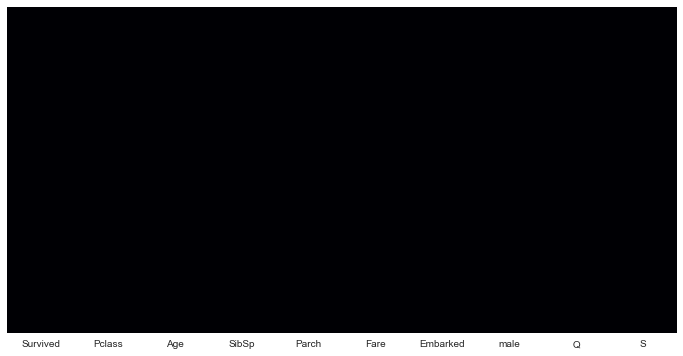

In [86]:
#Replacing the missing age data
train['Age'] = train[['Age', 'Pclass']].apply(input_age, axis=1)
#Deleting the missing cabin data
del train['Cabin'] #train.drop('Cabin', inplace = True)
#Deleting the missing embarked data
train.dropna(inplace=True)
#Visualize the data cleaning
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='inferno')

In [89]:
#Transform categorical data to numerical data (essential for the model)
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

#Deleting unnecessary data for the model
train.drop(['Sex', 'PassengerId', 'Name', 'Ticket','Embarked'], axis=1, inplace=True)

#Concatenate data in columns, instead of rows (table format)
train = pd.concat([train, sex, embark], axis = 1)

#Returns the first 49 rows
train.head(50)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
5,0,3,24.0,0,0,8.4583,1,1,0
6,0,1,54.0,0,0,51.8625,1,0,1
7,0,3,2.0,3,1,21.0750,1,0,1
8,1,3,27.0,0,2,11.1333,0,0,1
9,1,2,14.0,1,0,30.0708,0,0,0


## 4. Predictive Model

In [159]:
#Split the data to train/testing
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size=0.3)

#Implement the predictive model (logistic regression)
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

#Apply the predictive model (logistic regression)
predictions = logmodel.predict(X_test)

#Return the classification report and the confusion matrix
#Classification report: 84% (could easily be better with further feature engineering)
#Confusion matrix: 20 false positives (predicted survivers, that actually didn't survive) is a relatively high number,but 
#still accetpable considering the total number of passengers (267)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       169
           1       0.79      0.78      0.78        98

    accuracy                           0.84       267
   macro avg       0.83      0.83      0.83       267
weighted avg       0.84      0.84      0.84       267

[[149  20]
 [ 22  76]]


C:\Users\35193\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Note: the predictive model could have been more minucious, If in the data cleaning stage instead of deleting "unnecessary" data it would have been replaced by a statistical parameter. 